# Pymaceuticals Homework Set

## Observations and Insights

1) In the summary statistics, I noticed that Capomulin and Ramicane had the smallest variances (and smallest standard deviations) of the drugs tested. Looking closer, I realized that these two drugs had larger mouse populations than the others. This is also evident in the bar graph of total number of timepoints per drug — if you have more mice, you will have more timepoints.

2) I noticed that the researchers used about the same number of male and female mice overall. This seems a little unusual, since medical research tends to avoid female lab specimens for fear of confounding factors involving reproduction and hormones, but not a bad thing. In my understanding, having a drug trial on a population that more accurately reflects the population at large could make the results more applicable to real-world outcomes.

3) I noticed that there appears to be a correlation between the weight of a mouse and the volume of its tumor when being treated by Capomulin. The scatter plot and linear regression suggest that the heavier a mouse is, the larger its tumor will be. 

## Setting up the Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

In [5]:
# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
num_of_mice = complete_data["Mouse ID"].nunique()

num_of_mice

249

## Cleaning the Data

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

complete_data.duplicated(keep = False, subset = ["Mouse ID","Timepoint"])

duplicates_df = complete_data[complete_data.duplicated(keep = False, subset = ["Mouse ID","Timepoint"])]

duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
complete_data.loc[complete_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
clean_df = complete_data.drop(range(908,921))

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_df["Mouse ID"].nunique()

clean_num_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [12]:
drug_regimens = clean_df["Drug Regimen"].unique()

drug_regimens.sort()

drug_regimens

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [13]:
# Group dataframe by drug regimen

grouped_drug_df = clean_df.groupby("Drug Regimen")

In [14]:
# Calculate means of tumor volume by drug

means_series = grouped_drug_df["Tumor Volume (mm3)"].mean()
means_series

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Calculate medians of tumor volume by drug
medians_series = grouped_drug_df["Tumor Volume (mm3)"].median()
medians_series

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Calculate variances of tumor volume by drug

variances_series = grouped_drug_df["Tumor Volume (mm3)"].var()

variances_series

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Calculate standard deviations of tumor volume by drug

st_devs_series = grouped_drug_df["Tumor Volume (mm3)"].std()

st_devs_series

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Calculate standard errors of the means of tumor volume by drug 

sem_series = grouped_drug_df["Tumor Volume (mm3)"].sem()

sem_series

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Create the summary dataframe

summary_df = pd.DataFrame({"Mean": means_series, "Median": medians_series, "Variance": variances_series, "Standard Deviation": st_devs_series, "Standard Error": sem_series})

summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [155]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg_df = grouped_drug_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem", "count"])

summary_agg_df

# This is really slick!

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [156]:
# Rename the columns to make them nicer

summary_agg_df = summary_agg_df.rename(columns = {"mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "Standard Error", "count": "Count"})

summary_agg_df

,Mean,Median,Variance,Standard Deviation,Standard Error,Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

In [22]:
# Create data set for bar charts: total number of timepoints for all mice tested for each drug regimen

timepoints_series = grouped_drug_df["Timepoint"].count()

timepoints_series

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<AxesSubplot:title={'center':'Total Timepoints by Drug Regimen'}, xlabel='Drug Regimen'>

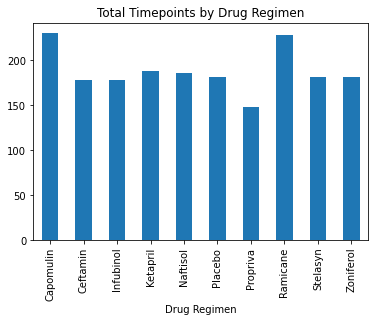

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_bar_pandas = timepoints_series.plot.bar(x="Drug Regimen", title = "Total Timepoints by Drug Regimen")

timepoints_bar_pandas

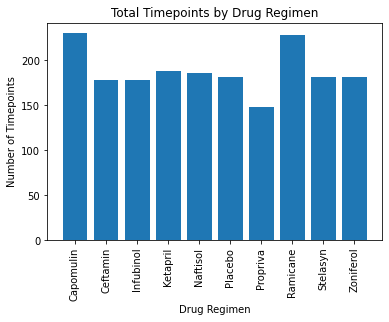

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints_bar_plt = plt.bar(x= drug_regimens, height = timepoints_series)

plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation = 90)

plt.show()

In [25]:
# Create data set for pie charts: the distribution of female and male mice

sex_distribution_series = clean_df["Sex"].value_counts()

sex_distribution_series

Male      958
Female    922
Name: Sex, dtype: int64

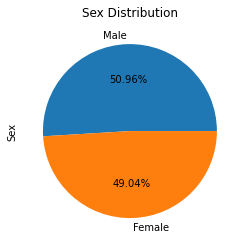

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution_pandas = sex_distribution_series.plot.pie(title = "Sex Distribution", autopct="%.2f%%")

<function matplotlib.pyplot.show(close=None, block=None)>

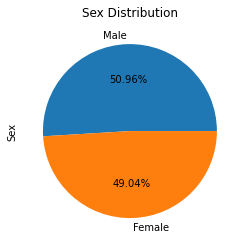

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_distribution_plt = plt.pie(sex_distribution_series, labels = ["Male", "Female"], autopct="%.2f%%")
plt.title("Sex Distribution")
plt.ylabel("Sex")


plt.show

## Quartiles, Outliers, and Box Plots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

In [87]:
# Get data for only Capomulin mice
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

capomulin_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [111]:
# Group data by mouse, find the maximum timepoint for each mouse

max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

max_timepoint = max_timepoint.reset_index()

max_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [112]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

clean_max_time = max_timepoint.merge(clean_df, on = ["Mouse ID", "Timepoint"], how = "left")

clean_max_time

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


Huge thanks to TA Chris for helping me get this next section working!!!!

In [152]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

# Create empty list for outliers

outliers = []

for drug in treatment_list:
    
    final_volumes = clean_max_time.loc[clean_max_time["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append(final_volumes)
    
    # Find the quartile values
    
    quartiles = list(final_volumes.quantile([0.25, 0.5, 0.75]))
    print(f"The quartiles for {drug} are: {quartiles}")
    
    # Find the inter-quartile range (IQR)
    
    iqr = quartiles[2] - quartiles[0]
    print(f"The IQR for {drug} is: {iqr}")
    
    # Find the upper bound
    upper_bound = quartiles[2] + (iqr * 1.5)
    print(f"The upper bound for potential outliers in {drug} is: {upper_bound}")
    
    # Find the lower bound
    lower_bound = quartiles[0] - (iqr * 1.5)
    print(f"The lower bound for potential outliers in {drug} is: {lower_bound}")
    
    #Find the outliers
    outliers = list(final_volumes.loc[(final_volumes > upper_bound) | (final_volumes < lower_bound)])
        
    num_of_outliers = len(outliers)
    print(f"There are {num_of_outliers} outliers in the {drug} data.")
    
    if num_of_outliers > 0:
        print(f"The potential outliers are: {outliers}")
    
    # Reset outliers list for next drug 
    outliers = []
    print("")
    
tumor_vol_list

The quartiles for Capomulin are: [32.37735684, 38.1251644, 40.1592203]
The IQR for Capomulin is: 7.781863460000004
The upper bound for potential outliers in Capomulin is: 51.83201549
The lower bound for potential outliers in Capomulin is: 20.70456164999999
There are 0 outliers in the Capomulin data.

The quartiles for Ramicane are: [31.56046955, 36.56165229, 40.65900627]
The IQR for Ramicane is: 9.098536719999998
The upper bound for potential outliers in Ramicane is: 54.30681135
The lower bound for potential outliers in Ramicane is: 17.912664470000003
There are 0 outliers in the Ramicane data.

The quartiles for Infubinol are: [54.04860769, 60.16518046, 65.52574285]
The IQR for Infubinol is: 11.477135160000003
The upper bound for potential outliers in Infubinol is: 82.74144559000001
The lower bound for potential outliers in Infubinol is: 36.83290494999999
There are 1 outliers in the Infubinol data.
The potential outliers are: [36.3213458]

The quartiles for Ceftamin are: [48.72207785, 

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

<function matplotlib.pyplot.show(close=None, block=None)>

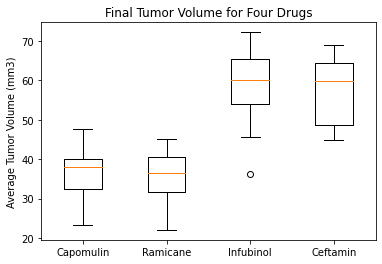

In [145]:
plt.boxplot(tumor_vol_list)
plt.title("Final Tumor Volume for Four Drugs")
plt.xticks(ticks = [1, 2, 3, 4], labels = treatment_list)
plt.ylabel("Average Tumor Volume (mm3)")

plt.show

## Line and Scatter Plots

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# I chose Mouse ID b742

b742_data = clean_df.loc[clean_df["Mouse ID"] == "b742"]
b742_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0
295,b742,Capomulin,Male,7,21,25,38.617684,0
296,b742,Capomulin,Male,7,21,30,39.167949,0
297,b742,Capomulin,Male,7,21,35,39.847576,0
298,b742,Capomulin,Male,7,21,40,38.255627,0
299,b742,Capomulin,Male,7,21,45,38.939633,0


In [71]:
x_values = b742_data["Timepoint"]

x_values

290     0
291     5
292    10
293    15
294    20
295    25
296    30
297    35
298    40
299    45
Name: Timepoint, dtype: int64

In [72]:
y_values = b742_data["Tumor Volume (mm3)"]

y_values

290    45.000000
291    41.534097
292    41.999228
293    39.524843
294    37.950355
295    38.617684
296    39.167949
297    39.847576
298    38.255627
299    38.939633
Name: Tumor Volume (mm3), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

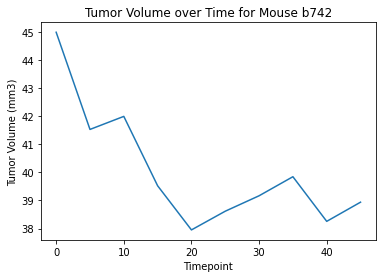

In [73]:
# Plotting the data
plt.plot(x_values, y_values)
plt.title("Tumor Volume over Time for Mouse b742")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show

In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Finding the mean weight of each mouse in the Capomulin group

weight_cap = cap_group["Weight (g)"].mean()
weight_cap

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

In [75]:
# Finding the average tumor volume for each mouse in Capomulin group 

avg_tumor_cap = cap_group["Tumor Volume (mm3)"].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

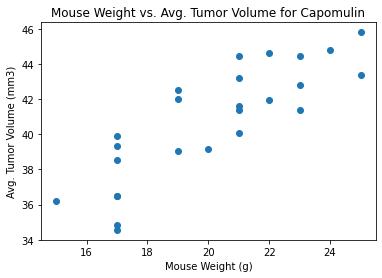

In [102]:
# Plotting the data

plt.scatter(weight_cap, avg_tumor_cap)
plt.title("Mouse Weight vs. Avg. Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")

plt.show

## Correlation and Regression

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, sterr) = st.linregress(weight_cap, avg_tumor_cap)

print(slope, intercept)

0.9544396890241048 21.552160532685008


In [154]:
# Print the correlation coefficient (r)

correlation_coeff = rvalue

correlation_coeff

0.842

In [80]:
# Calculate the regression values for each mouse

regress_values = (slope * weight_cap) + intercept

regress_values

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64

In [92]:
# Round the slope and intercept to 2 decimal places

slope_round = round(slope, 3)
intercept_round = round(intercept, 3)

In [95]:
# Construct the regression line equation

line_eq = f"y = {slope_round}x + {intercept_round}"

<function matplotlib.pyplot.show(close=None, block=None)>

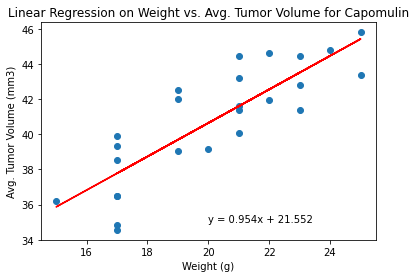

In [101]:
# Plot the regression line on the scatter plot

plt.scatter(weight_cap, avg_tumor_cap)
plt.plot(weight_cap, regress_values, "r-")
plt.annotate(line_eq, (20,35))
plt.title("Linear Regression on Weight vs. Avg. Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")

plt.show